In [1]:
# volatility

In [2]:
import numpy as np
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [3]:
df = obb.equity.price.historical(
    "AAPL",
    start_date="2020-01-01",
    provider="yfinance"
)

In [4]:
close = df["close"]

In [5]:
returns = close.pct_change()

In [6]:
std_dev = returns.dropna().std()

In [8]:
std_dev

0.02040977913174551

In [14]:
#under the assumption of independent daily returns.

'''
	•	Multiplication by the square root of 252 adjusts daily standard deviation to an annual scale.
	•	The number 252 represents the typical number of trading days in a year.
	•	Variance (the square of standard deviation) is additive over time, unlike standard deviation.
	•	To annualize, daily variance is multiplied by 252 and then square-rooted to revert to standard deviation.
	•	This scaling process assumes independent daily returns and respects the additive property of variance.
'''


'\n\t•\tMultiplication by the square root of 252 adjusts daily standard deviation to an annual scale.\n\t•\tThe number 252 represents the typical number of trading days in a year.\n\t•\tVariance (the square of standard deviation) is additive over time, unlike standard deviation.\n\t•\tTo annualize, daily variance is multiplied by 252 and then square-rooted to revert to standard deviation.\n\t•\tThis scaling process assumes independent daily returns and respects the additive property of variance.\n'

In [7]:
annualized_std_dev = std_dev * np.sqrt(252)

In [9]:
annualized_std_dev

0.32399519937812643

In [13]:
close

date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2024-08-26    227.179993
2024-08-27    228.029999
2024-08-28    226.490005
2024-08-29    229.789993
2024-08-30    229.000000
Name: close, Length: 1174, dtype: float64

In [15]:
'''
	•	Volatility can be annualized to match the frequency of returns.
	•	For long periods, you may work with monthly or quarterly returns.
	•	Daily data can be resampled to a monthly or quarterly period.
	•	This adjustment ensures the volatility measure aligns with the chosen timeframe.
'''


'\n\t•\tVolatility can be annualized to match the frequency of returns.\n\t•\tFor long periods, you may work with monthly or quarterly returns.\n\t•\tDaily data can be resampled to a monthly or quarterly period.\n\t•\tThis adjustment ensures the volatility measure aligns with the chosen timeframe.\n'

In [17]:
close.index = pd.to_datetime(close.index)
(
    close
    .pct_change(freq="ME")
    .dropna()
    .std()
    * np.sqrt(12)
)

0.30423665756325935

In [19]:
# Similarly, for quarters, you can pass the freq argument and multiply the standard deviation by the square root of 4:

(
    close
    .pct_change(freq="QE")
    .dropna()
    .std()
    * np.sqrt(4)
)

0.38461527636615106

In [20]:
	'''
    •	Analyzing historical price changes provides a broader view of price movements over time.
	•	It’s crucial to understand both the magnitude and frequency of past price changes.
	•	The pandas rolling method can be used to calculate and plot annualized volatility over time.
	•	This approach helps visualize how volatility has changed historically.
    '''


SyntaxError: invalid character '•' (U+2022) (4053633632.py, line 1)

<Axes: xlabel='date'>

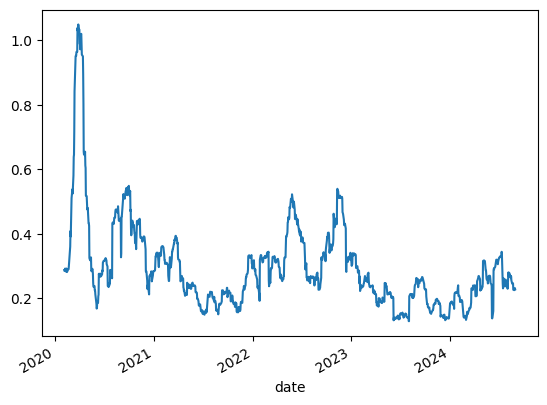

In [23]:
(
    close
    .pct_change()
    .rolling(window=22)
    .std()
    * np.sqrt(252)
).plot()

In [24]:
## https://www.investopedia.com/terms/v/volatility.asp